<a href="https://colab.research.google.com/github/Disha-1102/first-repository/blob/main/Level1_Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Level 1: Task 1**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df=pd.read_csv("/content/Dataset.csv")

In [2]:
print("ROWS:",len(df))

ROWS: 9551


In [3]:
print("COLUMNS:",df.shape[1])

COLUMNS: 21


In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
print("Columns in dataset:\n", df.columns.tolist())
possible_names = ['Cuisines', 'Cuisine', 'Cuisine(s)', 'cuisines']

cuisine_col = None
for name in possible_names:
    if name in df.columns:
        cuisine_col = name
        break

if cuisine_col is None:
    raise ValueError("Could not find a cuisine column. Check column names above and set 'cuisine_col' manually.")
else:
    print("Using cuisine column:", cuisine_col)

Columns in dataset:
 ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Using cuisine column: Cuisines


In [6]:
cuisine_series = (
    df[cuisine_col]
      .dropna()
      .astype(str)
      .str.split(',')
      .explode()
      .str.strip()
)
cuisine_counts = cuisine_series.value_counts()
top_n = 3
top_cuisines = cuisine_counts.head(top_n)
total_restaurants = len(df)
percentages = (top_cuisines / total_restaurants) * 100
result = pd.DataFrame({
    'Cuisine': top_cuisines.index,
    'Count': top_cuisines.values,
    'Percentage (%)': percentages.round(2).values
})
result = result.reset_index(drop=True)
result

,Cuisine,Count,Percentage (%)
0,North Indian,3960,41.46
1,Chinese,2735,28.64
2,Fast Food,1986,20.79


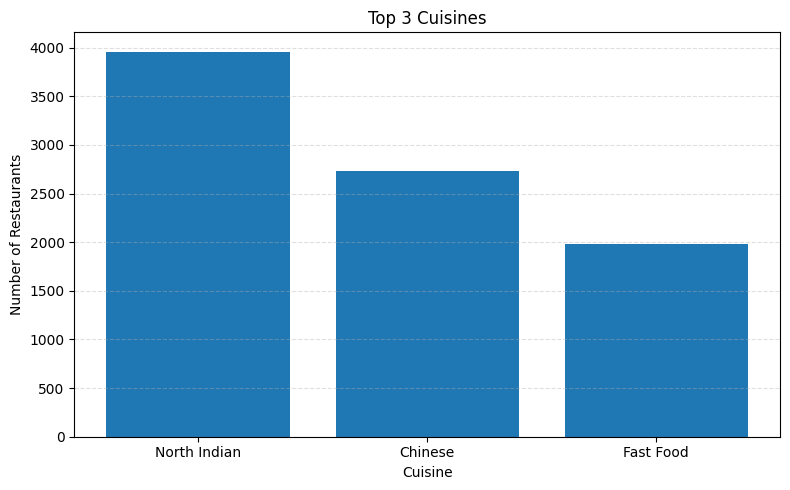

In [7]:
plt.figure(figsize=(8,5))
plt.bar(result['Cuisine'], result['Count'])
plt.title(f"Top {top_n} Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Level 1: Task 2**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

file_path = "/content/Dataset.csv"   # change if your filename differs
df = pd.read_csv(file_path)
print("Loaded rows:", len(df))
df.head()

Loaded rows: 9551


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
print("Columns:", df.columns.tolist())
city_candidates = ['City', 'city', 'CITY', 'City Name', 'City_Name']
rating_candidates = ['Aggregate rating', 'Aggregate_rating', 'Rating', 'rating', 'Average Rating', 'Avg Rating']
city_col = next((c for c in city_candidates if c in df.columns), None)
rating_col = next((c for c in rating_candidates if c in df.columns), None)

if city_col is None:
    raise ValueError("Could not automatically find a city column. Check df.columns and set `city_col` manually.")
if rating_col is None:
    raise ValueError("Could not automatically find a rating column. Check df.columns and set `rating_col` manually.")

print("Using city column:", city_col)
print("Using rating column:", rating_col)

Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Using city column: City
Using rating column: Aggregate rating


In [10]:
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
print("Rating column stats (after conversion):")
print(df[rating_col].describe())
print("Missing ratings:", df[rating_col].isna().sum())
print("Unique cities:", df[city_col].nunique())

Rating column stats (after conversion):
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64
Missing ratings: 0
Unique cities: 141


a. City with the highest number
of restaurants in the dataset

In [11]:
city_counts = df[city_col].dropna().value_counts()
city_counts_head = city_counts.head(20)   # top 20 preview
print("Top cities by number of restaurants:")
print(city_counts_head)
top_city_by_count = city_counts.idxmax()
top_city_count = city_counts.max()
print(f"\nCity with the highest number of restaurants: {top_city_by_count} ({top_city_count} restaurants)")


Top cities by number of restaurants:
City
New Delhi          5473
Gurgaon            1118
Noida              1080
Faridabad           251
Ghaziabad            25
Bhubaneshwar         21
Lucknow              21
Ahmedabad            21
Amritsar             21
Guwahati             21
Rio de Janeiro       20
Bras�_lia            20
Albany               20
Doha                 20
Cape Town            20
Manchester           20
London               20
Edinburgh            20
Birmingham           20
Wellington City      20
Name: count, dtype: int64

City with the highest number of restaurants: New Delhi (5473 restaurants)


b. Calculate the average rating for
restaurants in each city

In [13]:
min_restaurants = 5
city_stats = df.groupby(city_col).agg(
    Avg_Rating=(rating_col, 'mean'),
    Restaurant_Count=(rating_col, 'count')   # count uses rating non-null; if you want total rows use size()
).reset_index()
city_stats_filtered = city_stats[city_stats['Restaurant_Count'] >= min_restaurants].copy()
top_by_count_df = city_stats.sort_values('Restaurant_Count', ascending=False).head(10)
top_by_avg_rating_df = city_stats_filtered.sort_values('Avg_Rating', ascending=False).head(10)

print("Top cities by restaurant count (top 10):")
display(top_by_count_df)



Top cities by restaurant count (top 10):


,City,Avg_Rating,Restaurant_Count
88,New Delhi,2.438845,5473
50,Gurgaon,2.651431,1118
89,Noida,2.036204,1080
43,Faridabad,1.866932,251
48,Ghaziabad,2.852000,25
17,Bhubaneshwar,3.980952,21
69,Lucknow,4.195238,21
51,Guwahati,4.190476,21
2,Ahmedabad,4.161905,21
5,Amritsar,3.685714,21


c. Determine the city with the highest
average rating

In [14]:
print(f"\nTop cities by average rating (min_restaurants={min_restaurants}):")
display(top_by_avg_rating_df)
if not city_stats_filtered.empty:
    best_city_by_avg = city_stats_filtered.loc[city_stats_filtered['Avg_Rating'].idxmax()]
    print(f"\nCity with highest average rating (min {min_restaurants} restaurants): {best_city_by_avg[city_col]} with avg rating {best_city_by_avg['Avg_Rating']:.2f} ({int(best_city_by_avg['Restaurant_Count'])} restaurants)")
else:
    print("No city meets the minimum restaurant threshold.")


Top cities by average rating (min_restaurants=5):


,City,Avg_Rating,Restaurant_Count
67,London,4.535000,20
91,Orlando,4.475000,20
110,Rest of Hawaii,4.410000,20
124,Tampa Bay,4.410000,20
14,Bangalore,4.375000,20
39,Dubai,4.370000,20
59,Jakarta,4.356250,16
54,Hyderabad,4.344444,18
26,Chennai,4.315000,20
6,Ankara,4.305000,20



City with highest average rating (min 5 restaurants): London with avg rating 4.54 (20 restaurants)


Top 10 cities by Number of Restraunts

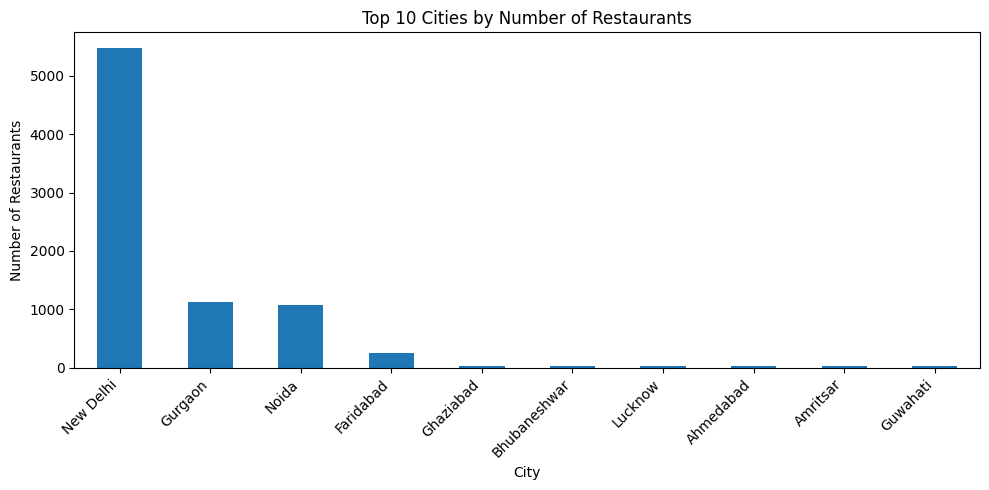

In [24]:
top_n = 10
plt.figure(figsize=(10,5))
city_counts.head(top_n).plot(kind='bar')
plt.title(f"Top {top_n} Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Level 1: Task 3**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = "/content/Dataset.csv"   # Adjust if filename differs
df = pd.read_csv(file_path)
print("Rows:", len(df))
df.head()

Rows: 9551


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
print("Columns:", df.columns.tolist())

possible_price_cols = ['Price range', 'Price Range', 'price_range', 'Price', 'Cost', 'Cost for Two']
price_col = next((c for c in possible_price_cols if c in df.columns), None)

if price_col is None:
    raise ValueError("Couldn't find a price range column — please check column names above and set it manually.")
else:
    print("Using price range column:", price_col)


Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Using price range column: Price range


In [20]:
print("Unique price range values:", df[price_col].unique())
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
df = df.dropna(subset=[price_col])

Unique price range values: [3 4 2 1]


In [21]:
price_counts = df[price_col].value_counts().sort_index()


total_restaurants = len(df)
price_percentages = (price_counts / total_restaurants) * 100

result = pd.DataFrame({
    'Price Range': price_counts.index.astype(int),
    'Count': price_counts.values,
    'Percentage (%)': price_percentages.round(2).values
})
result = result.sort_values('Price Range').reset_index(drop=True)

result

,Price Range,Count,Percentage (%)
0,1,4444,46.53
1,2,3113,32.59
2,3,1408,14.74
3,4,586,6.14


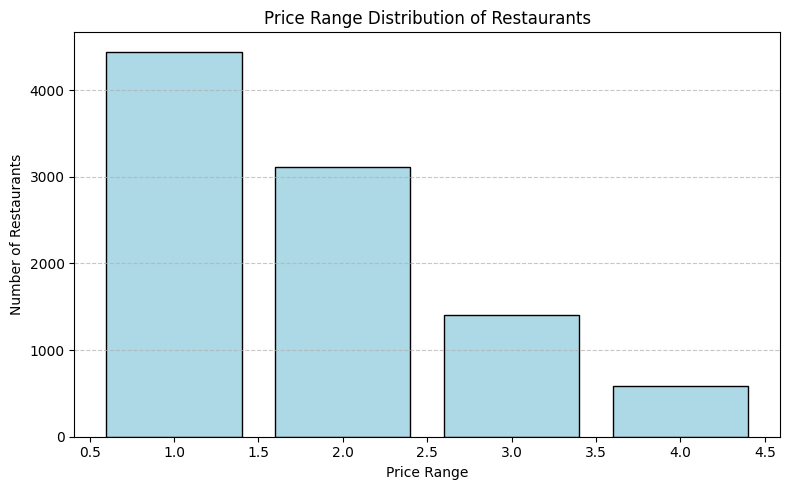

In [22]:
plt.figure(figsize=(8,5))
plt.bar(result['Price Range'], result['Count'], color='lightblue', edgecolor='black')
plt.title("Price Range Distribution of Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Level 1: Task 4**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
file_path = "/content/Dataset.csv"   # adjust filename if needed
df = pd.read_csv(file_path)
print("Rows:", len(df))
df.head()

Rows: 9551


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Determine the percentage of restaurants
that offer online delivery.

In [33]:
online_delivery_counts = df['Has Online delivery'].value_counts()
online_delivery_percentage = (online_delivery_counts / len(df)) * 100

print("Number of Restaurants (Online Delivery):")
print(online_delivery_counts)
print("\nPercentage of Restaurants (Online Delivery):")
print(online_delivery_percentage.round(2))

Number of Restaurants (Online Delivery):
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

Percentage of Restaurants (Online Delivery):
Has Online delivery
No     74.34
Yes    25.66
Name: count, dtype: float64


Compare the average ratings of restaurants
with and without online delivery

In [34]:
ratings_comparison = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("Average Ratings:")
print(ratings_comparison)

Average Ratings:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


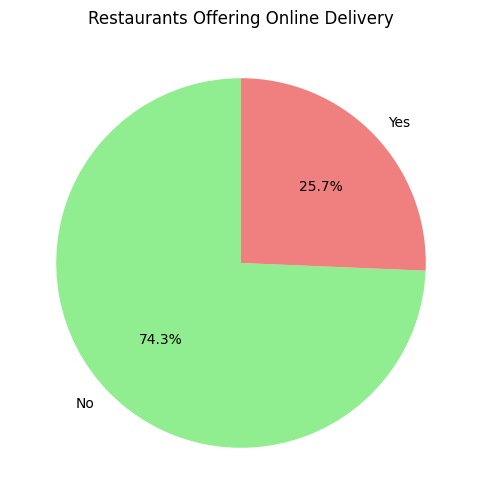

In [35]:
plt.figure(figsize=(6,6))
plt.pie(
    online_delivery_counts,
    labels=online_delivery_counts.index,
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    startangle=90
)
plt.title("Restaurants Offering Online Delivery")
plt.show()